In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


In [ ]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Example training images and their labels:[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels:['frog', 'truck', 'truck', 'dog', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


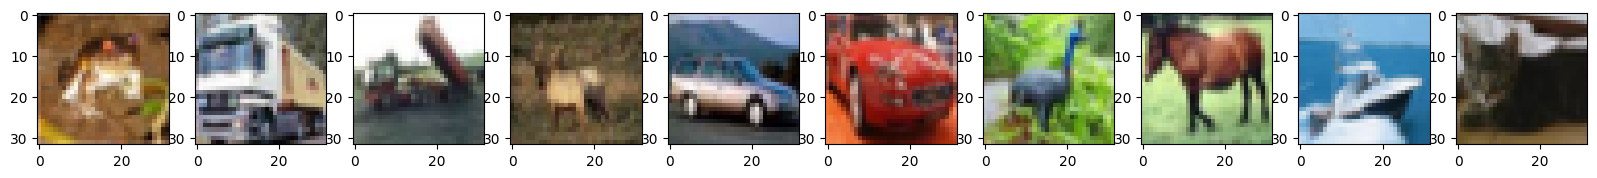

In [ ]:
cifar10_classes=['airplane','automobile','bird','cat','dog','deer','frog','horse','ship','truck']
print("Example training images and their labels:"+str([x[0] for x in y_train[0:10]]))
print("Corresponding classes for the labels:"+str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1, 10)
fig.set_size_inches(20,6)

for i in range(10):
  image=x_train[i]
  axarr[i].imshow(image)
plt.show()

In [ ]:
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
ann=keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3)))
ann.add(Dense(2048,activation='relu'))
ann.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       6,293,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,313,994 (24.09 MB)

 Trainable params: 6,313,994 (24.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
history=ann.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2862 - loss: 2.3034 - val_accuracy: 0.3635 - val_loss: 1.7359
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3861 - loss: 1.7065 - val_accuracy: 0.4150 - val_loss: 1.6502
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4205 - loss: 1.6244 - val_accuracy: 0.4204 - val_loss: 1.6119
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4411 - loss: 1.5595 - val_accuracy: 0.4431 - val_loss: 1.5754
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4510 - loss: 1.5404 - val_accuracy: 0.4521 - val_loss: 1.5319
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4669 - loss: 1.4939 - val_accuracy: 0.4421 - val_loss: 1.5786
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4753 - loss: 1.4765 - val_accuracy: 0.4625 - val_loss: 1.5079
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4803 - loss: 1.4640 - 

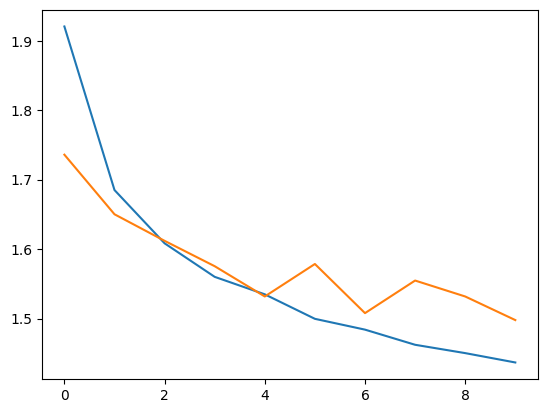

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])


In [ ]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [ ]:
cnn=keras.Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),strides=(1,1),padding=("same"),activation='relu',input_shape=(32,32,3))) # Changed 'paddding' to 'padding'
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size=(3,3),strides=(1,1),padding=("same"),activation='relu')) # Changed 'paddding' to 'padding'
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size=(3,3),strides=(1,1),padding=("same"),activation='relu')) # Changed 'paddding' to 'padding'
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size=(3,3),strides=(1,1),padding=("same"),activation='relu')) # Changed 'paddding' to 'padding'
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,666 (1.73 MB)

 Trainable params: 454,666 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history=cnn.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3534 - loss: 1.7343 - val_accuracy: 0.5662 - val_loss: 1.2385
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6329 - loss: 1.0315 - val_accuracy: 0.6788 - val_loss: 0.9374
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7228 - loss: 0.7939 - val_accuracy: 0.7129 - val_loss: 0.8268
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7759 - loss: 0.6422 - val_accuracy: 0.7377 - val_loss: 0.7590
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8119 - loss: 0.5442 - val_accuracy: 0.7346 - val_loss: 0.8016
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8423 - loss: 0.4425 - val_accuracy: 0.7408 - val_loss: 0.8070
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8756 - loss: 0.3570 - val_accuracy: 0.7359 - val_loss: 0.8876
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9035 - loss: 0.276

In [ ]:
def plotlosses(history):
  plt.plot(history.history["loss"])
  plt.plot(history.history["val_loss"])
  plt.title("Model Loss")
  plt.ylabel("Loss")
  plt.xlabel("Epochs")
  plt.legend(["train","validation"],loc="upper left")
  plt.show()

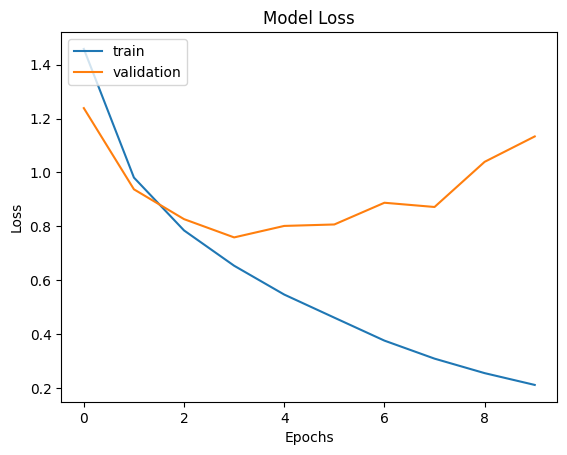

In [ ]:
plotlosses(history)

In [ ]:
def plotaccuracies(history):
  plt.plot(history.history["accuracy"])
  plt.plot(history.history["val_accuracy"])
  plt.title("Model Accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["train","validation"],loc="upper left")
  plt.show()

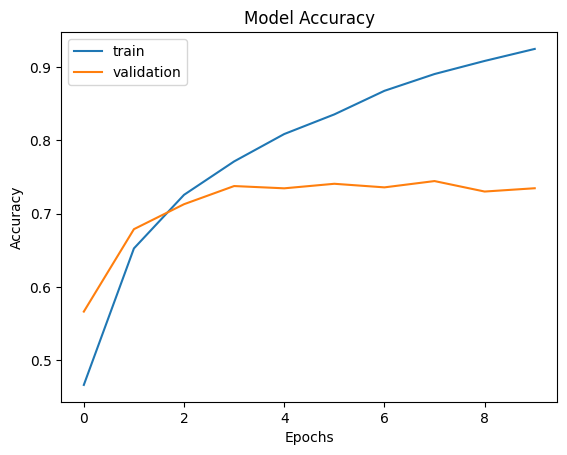

In [ ]:
plotaccuracies(history)

In [ ]:
score=cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7393 - loss: 1.1260


In [ ]:
print(cnn.metrics_names)
print(score)

['loss', 'compile_metrics']
[1.1334891319274902, 0.7347000241279602]


In [ ]:
from keras.models import load_model
cnn.save("cifar10_cnn.h5")